# AirPassengers Forecast using Time Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6 #size

In [2]:
dataset=pd.read_csv("J:/sets/AirPassengers.csv")
#parse strings to datetime type
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['Month'])

In [3]:
from datetime import datetime
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


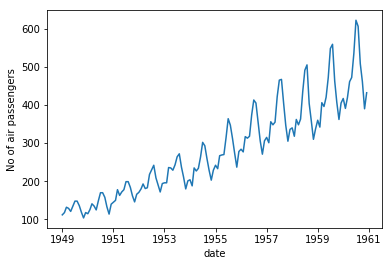

In [4]:
#plot graph
plt.xlabel('date')
plt.ylabel('No of air passengers')
plt.plot(indexedDataset)

## test of stationarity

### determining rolling statistics

In [5]:
rolmean=indexedDataset.rolling(window=12).mean() #monthly level so window=12, if you need day level use window=365

rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

J:\Anaconda\lib\site-packages\matplotlib\legend.py:638: UserWarning: Unrecognized location "b". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


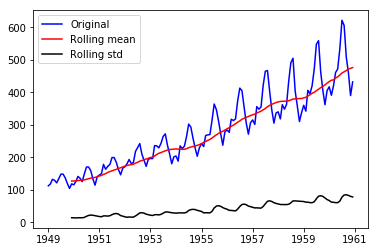

In [6]:
# plot rolling statistics:
orig=plt.plot(indexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean, color='red',label='Rolling mean')
std=plt.plot(rolstd, color='black',label='Rolling std')
plt.legend(loc='b')

In [9]:
#perform dickey_fuller
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(indexedDataset['#Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


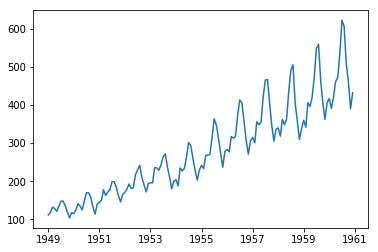

In [10]:
#Estimate the trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset)

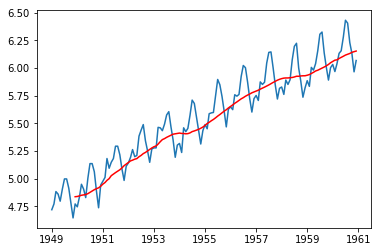

In [11]:
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [13]:
datasetLogScaleMinusMovingAverage=indexedDataset_logScale-movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#remove nan values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(20)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #determine rollind statistics
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    orig=plt.plot(timeseries, color='blue', label='original')
    mean=plt.plot(movingAverage, color='red', label='Rolling Mean') 
    std=plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
   
    #perform dickey-fuller test
    print('result of Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

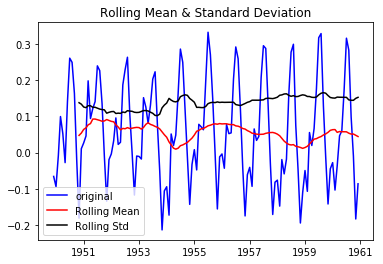

result of Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [20]:
test_stationarity(datasetLogScaleMinusMovingAverage)

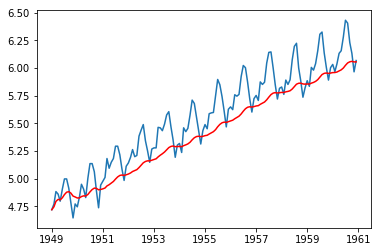

In [21]:
exponentialDecayWeightedAverage=indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

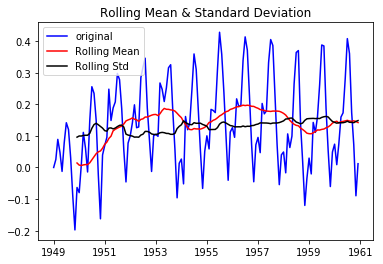

result of Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [22]:
datasetLogScaleMinusMovingExponentialDecayAverage=indexedDataset_logScale-exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

**data is stationary**

In [23]:
##shift the values in time series so that we can use in forecasting

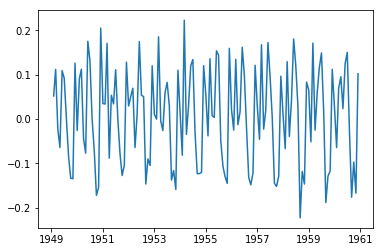

In [24]:
datasetLogDiffShifting=indexedDataset_logScale-indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

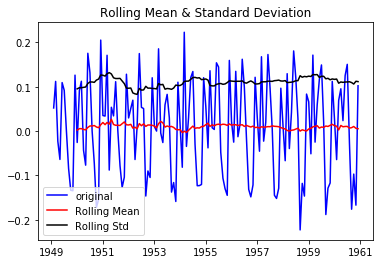

result of Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [25]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

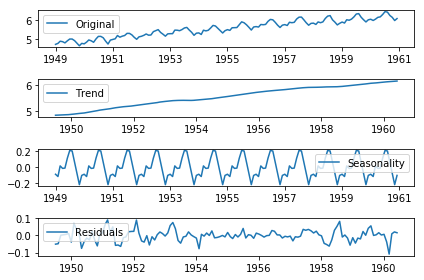

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

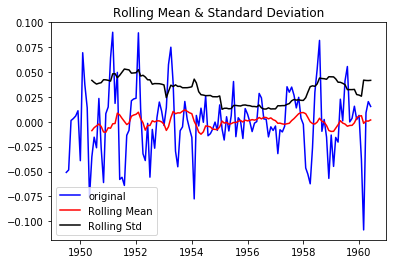

result of Dickey-Fuller Test: 
Test Statistic         -6.332387e+00
p-value                 2.885059e-08
Lags Used               9.000000e+00
No. of Obs              1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [28]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

## ACF and PACF graph

Text(0.5,1,'Partial Autocorrelation Function')

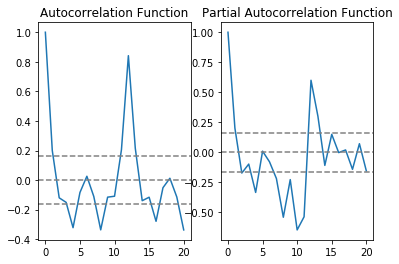

In [30]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(datasetLogDiffShifting, nlags=20)
lag_pacf=pacf(datasetLogDiffShifting, nlags=20, method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

# Modeling

J:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


plotting ARIMA model


J:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
J:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


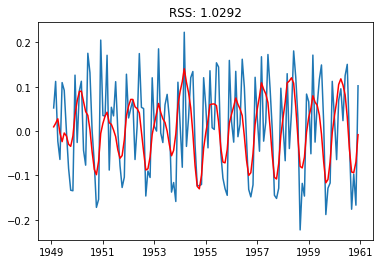

In [32]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model=ARIMA(indexedDataset_logScale, order=(2,1,2))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('plotting ARIMA model')

J:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
J:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
J:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


plotting ARIMA model


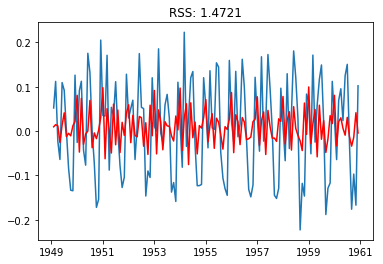

In [33]:
#MA model
model=ARIMA(indexedDataset_logScale, order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('plotting ARIMA model')

J:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
J:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
J:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 1.0292')

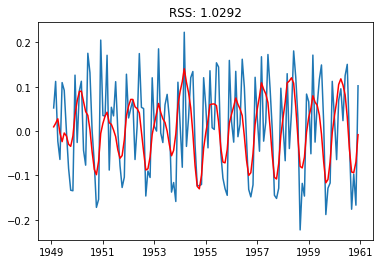

In [34]:
model=ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))


In [36]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [37]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [39]:
predictions_ARIMA_log=pd.Series(indexedDataset_logScale['#Passengers'].ix[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

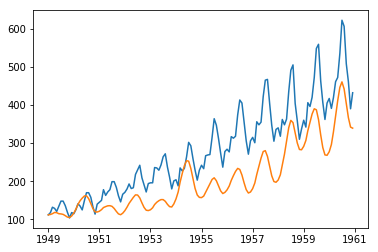

In [40]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [41]:
indexedDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


J:\Anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


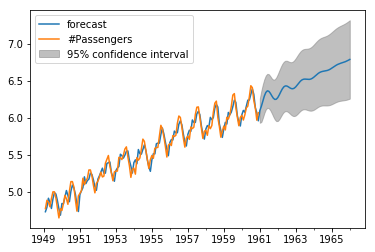

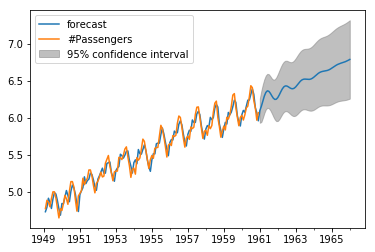

In [44]:
#predict for next 10 yrs
results_ARIMA.plot_predict(1,204)
#x=results_ARIMA.forecast(steps=120)

In [47]:
x=results_ARIMA.forecast(steps=120)

In [46]:
x[1]

array([0.08384711, 0.10749461, 0.11568693, 0.11702773, 0.11703495,
       0.11744016, 0.11762248, 0.11778712, 0.12024161, 0.12736041,
       0.13870958, 0.15118791, 0.16157812, 0.16834393, 0.17177327,
       0.1731198 , 0.17358729, 0.17385456, 0.17430214, 0.17543328,
       0.17788144, 0.18195719, 0.18726214, 0.1928339 , 0.19769241,
       0.20130636, 0.20369052, 0.20519829, 0.20625265, 0.20720995,
       0.20836967, 0.21000322, 0.2122974 , 0.21524474, 0.21860175,
       0.22198252, 0.2250306 , 0.22755291, 0.22954802, 0.23114794,
       0.23253821, 0.23390529, 0.23541305, 0.23718307, 0.23926533,
       0.24161533, 0.24410366, 0.24656352, 0.24885251, 0.25089624,
       0.25269728, 0.25431623, 0.25584306, 0.25737222, 0.25898384,
       0.26072844, 0.26261542, 0.26461083, 0.26664892, 0.26865475,
       0.27056842, 0.2723609 , 0.27403695, 0.27562767, 0.27717823,
       0.2787352 , 0.28033584, 0.28200011, 0.28372675, 0.28549503,
       0.28727203, 0.28902338, 0.2907233 , 0.29236076, 0.29394

In [48]:
len(x[1])

120

In [49]:
np.exp(x[1])

array([1.08746262, 1.11348486, 1.12264435, 1.1241506 , 1.12415872,
       1.12461433, 1.12481939, 1.12500459, 1.1277693 , 1.1358263 ,
       1.14879042, 1.16321522, 1.17536427, 1.18334352, 1.18740858,
       1.18900853, 1.18956452, 1.1898825 , 1.19041518, 1.19176247,
       1.19468367, 1.19956284, 1.20594337, 1.21268135, 1.21858752,
       1.22299939, 1.2259187 , 1.22776849, 1.22906369, 1.23024083,
       1.2316684 , 1.23368204, 1.23651557, 1.24016538, 1.24433562,
       1.24854956, 1.25236104, 1.25552386, 1.25803128, 1.26004563,
       1.26179866, 1.26352482, 1.26543135, 1.26767317, 1.27031555,
       1.27330429, 1.27647664, 1.27962046, 1.28255286, 1.28517673,
       1.28749347, 1.28957954, 1.29155002, 1.29352652, 1.29561287,
       1.29787517, 1.30032654, 1.30292382, 1.30558201, 1.3082034 ,
       1.31070928, 1.3130608 , 1.3152634 , 1.31735729, 1.3194015 ,
       1.32145737, 1.32357425, 1.32577887, 1.32806999, 1.33042046,
       1.33278673, 1.33512294, 1.33739447, 1.3395862 , 1.34170